In [ ]:
import tensorflow

In [ ]:
import os, sys
#to be able to interact with Google Drive's operating system
from google.colab import drive
#drive is a module that allows us use Python to interact with google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/MyDrive/GAN/GAN.zip (Unzipped Files)/')

In [ ]:
#@title to install pakages permanently in Google drive
import os, sys
#to be able to interact with Google Drive's operating system
from google.colab import drive
#drive is a module that allows us use Python to interact with google drive
drive.mount('/content/gdrive')
#mounting google drive allows us to work with its contents
nb_path = '/content/notebooks'
os.symlink('/content/gdrive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)  # or append(nb_path)
#The last three lines are what changes the path of the file.

!pip install --target=$nb_path tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 5.6 kB/s 
     |████████████████████████████████| 588.3 MB 7.0 kB/s 
     |████████████████████████████████| 11.2 MB 61.6 MB/s 
     |████████████████████████████████| 4.7 MB 27.0 MB/s 
     |████████████████████████████████| 134 kB 59.0 MB/s 
     |████████████████████████████████| 2.4 MB 51.0 MB/s 
     |████████████████████████████████| 439 kB 58.0 MB/s 
     |████████████████████████████████| 57 kB 5.2 MB/s 
     |████████████████████████████████| 1.1 MB 49.1 MB/s 
     |████████████████████████████████| 4.8 MB 40.8 MB/s 
     |████████████████████████████████| 40 kB 6.4 MB/s 
     |████████████████████████████████| 14.1 MB 43.2 MB/s 
     |████████████████████████████████| 75 kB 3.7 MB/s 
     |████████████

Import Dependencies and Data

In [ ]:
import tensorflow as tf
# using gpu
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)


In [ ]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
#bringing fashion dataset
import tensorflow_datasets as tfds
# Bringing matplotlib
from matplotlib import pyplot as plt
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
import matplotlib as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tfds.core.DatasetInfo(
    name='image_folder',
    full_name='image_folder/1.0.0',
    description="""
    Generic image classification dataset.
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    data_path='/content/gdrive/MyDrive/GAN/GAN.zip (Unzipped Files)',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=16),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=336, num_shards=1>,
        '~': <SplitInfo num_examples=unknown, num_shards=1>,
    },
    citation="""""",
)


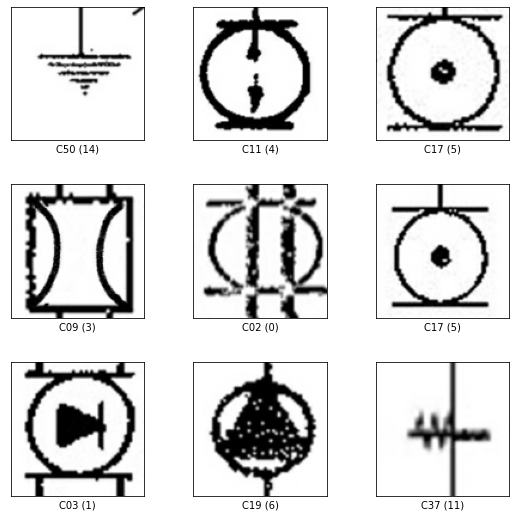

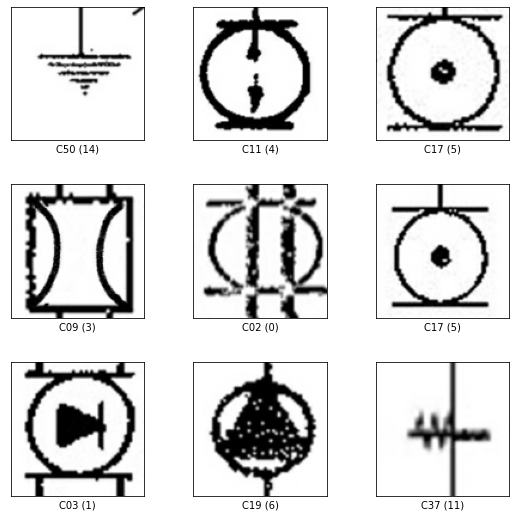

In [ ]:
builder = tfds.ImageFolder(r'/content/gdrive/MyDrive/GAN/GAN.zip (Unzipped Files)')

print(builder.info)  # num examples, labels... are automatically calculated
ds = builder.as_dataset(split='train', shuffle_files=True,as_supervised=True)
tfds.show_examples(ds, builder.info)

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
ds_fashion = tfds.load('fashion_mnist',split = 'train')

In [ ]:
ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
# Do some data transformation
import numpy as np
# setup connection aka iterator
dataiterator= ds.as_numpy_iterator()

In [ ]:
label_name = {
    0:'C02',
    1:	'C03',
    2	:'C04',
    3:	'C09',
    4:	'C11',
    5:	'C17',
    6:	'C19',
    7:	'C31',
    8:	'C32',
    9:	'C35',
    10: 'C36',
    11: 'C37',
    12: 'C38',
    13: 'C48',
    14: 'C50',
}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

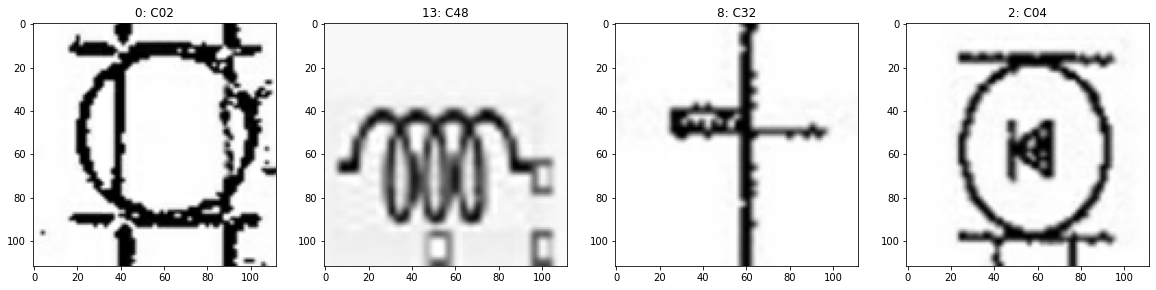

In [ ]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
# loop 4 times and get images
for idx in range(4):
    # Grab the image and label
    sample,label = dataiterator.next()
    # Plot the image in an specific subplot
    ax[idx].imshow(np.squeeze(sample))
    # Atach the label as text
    ax[idx].title.set_text(str(label)+': '+str(label_name[label]))

In [ ]:
# Scale and return images
def scale_images(data):
    image = data['image']
    print(type(image))
    print(type(image / 255))
    return image / 255

In [ ]:
type(ds)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [ ]:
def normalize_image(image, label):
    print(type(image))
    print(type(tf.cast(image, tf.float32) / 255.))
    image = tf.cast(image, tf.float32) / 255.
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.resize(image,[28,28])

    return image

In [ ]:
ds_new =ds.map(normalize_image)
type(ds_new)

<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>


tensorflow.python.data.ops.dataset_ops.MapDataset

In [ ]:
ds_new.as_numpy_iterator().next().shape

(28, 28, 1)

In [ ]:
import matplotlib.pyplot as plt

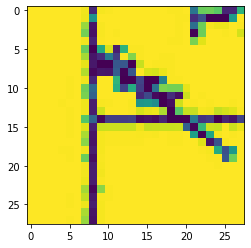

In [ ]:
plt.imshow(np.squeeze(ds_new.as_numpy_iterator().next()))

In [ ]:
np.array(np.squeeze(ds_new.as_numpy_iterator().next()))

array([[9.99900043e-01, 9.99900043e-01, 9.99900043e-01, 9.99900043e-01,
        9.99900043e-01, 9.99900043e-01, 9.99900043e-01, 9.99900043e-01,
        9.97939467e-01, 9.94018257e-01, 9.55786824e-01, 9.80294168e-01,
        9.78333592e-01, 9.92057681e-01, 2.96048820e-01, 1.75472662e-01,
        9.91077363e-01, 9.90097046e-01, 9.75392699e-01, 9.92057681e-01,
        9.95978832e-01, 9.97939467e-01, 9.99900043e-01, 9.99900043e-01,
        9.99900043e-01, 9.99900043e-01, 9.99900043e-01, 9.99900043e-01],
       [9.99900043e-01, 9.99900043e-01, 9.99900043e-01, 9.99900043e-01,
        9.99900043e-01, 9.99900043e-01, 9.99900043e-01, 9.99900043e-01,
        9.96959150e-01, 9.82254744e-01, 9.98919725e-01, 9.94998574e-01,
        9.98919725e-01, 9.89116788e-01, 2.77423233e-01, 1.72531769e-01,
        9.92057681e-01, 9.83235002e-01, 9.85195637e-01, 9.76372957e-01,
        9.94998574e-01, 9.99900043e-01, 9.99900043e-01, 9.99900043e-01,
        9.99900043e-01, 9.99900043e-01, 9.99900043e-01, 9.99900

In [ ]:
ds_new.as_numpy_iterator().next().shape

(28, 28, 1)

In [ ]:
# Reload the dataset
ds_fashion = tfds.load('fashion_mnist',split='train')
# Runing the dataset through the scale_image preprocessing step
ds_fashion = ds_fashion.map(scale_images)
print("ds fashion",ds_fashion)
# cache the dataset for that batch (The first time the dataset is iterated over, its elements will be cached either in the specified file or in memory. Subsequent iterations will use the cached data.)
ds_fashion = ds_fashion.cache()
# shuffle it up
ds_fashion = ds_fashion.shuffle(60000)
# Batch into 128 images per sample
ds_fashion = ds_fashion.batch(128)
# Reduce the likelihood of bottlenecking
# This often improves latency and throughput, at the cost of using additional memory to store prefetched elements
ds_fashion = ds_fashion.prefetch(64)

<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
ds fashion <MapDataset element_spec=TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None)>


In [ ]:
ds = ds.map(normalize_image)
print("my ds",ds)
# cache the dataset for that batch (The first time the dataset is iterated over, its elements will be cached either in the specified file or in memory. Subsequent iterations will use the cached data.)
ds = ds.cache()
# shuffle it up
ds = ds.shuffle(60000)
# Batch into 128 images per sample
ds = ds.batch(128)
# Reduce the likelihood of bottlenecking
# This often improves latency and throughput, at the cost of using additional memory to store prefetched elements
ds = ds.prefetch(64)

<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
my ds <MapDataset element_spec=TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None)>


In [ ]:
ds

<PrefetchDataset element_spec=TensorSpec(shape=(None, 112, 112, 1), dtype=tf.float32, name=None)>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Reshape,LeakyReLU,Dropout,UpSampling2D

In [ ]:
def build_generator():
    model = Sequential()

    # Takes in random values and reshapes it to 7x7x128
    # Beginnings of a generated image
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    # Upsampling block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # Upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))



    # Convolutional block 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolutional block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))



    # Conv layer to get to one channel
    # padding='same' : with zero padding
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))

    return model

In [ ]:
generator = build_generator()

In [ ]:
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                      

In [ ]:
# 4 rand image input 128
img = generator.predict(np.random.randn(4,128,1))
img.shape

1/1 [==============================] - 0s 74ms/step


(4, 28, 28, 1)

In [ ]:
#Setup the subplot format
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
# loop 4 times and get images
for idx,image in enumerate(img):

    # Plot the image in an specific subplot
    ax[idx].imshow(np.squeeze(image))
    # Atach the label as text
    ax[idx].title.set_text(str(idx)+': ')

3.3 Build Discriminator

In [ ]:
def build_discriminator():
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))



    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    return model

In [ ]:
discriminator = build_discriminator()

In [ ]:
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 128)      

In [ ]:
img.shape

(4, 28, 28, 1)

In [ ]:
discriminator.predict(img)

1/1 [==============================] - 0s 162ms/step


array([[0.5001951],
       [0.5002408],
       [0.5003778],
       [0.5002432]], dtype=float32)

# 4. Construct Training Loop

### 4.1 Setup Losses and Optimizers

In [ ]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is going to be the loss for both
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
g_opt = Adam(learning_rate=0.001) # learning rate of generator must be faster than descreaminator
d_opt = Adam(learning_rate=0.0001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [ ]:
# Importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [ ]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        # Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) # yhat = list of number between 0 to 1
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            # Create labels for real and fakes images (scale them to 0 and 1)
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Calculate loss - BINARYCROSS
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        # Apply backpropagation - nn learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)

            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)

            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [ ]:
# Create instance of subclassed model
fashgan = FashionGAN(generator, discriminator)

In [ ]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

# 4.3 Build Callback

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [ ]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img # number of images that we are going to generate
        self.latent_dim = latent_dim # the random values we are going to pass the generator

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('/content/gdrive/MyDrive/GAN/images', f'generated_img_{epoch}_{i}.jpg')) # save generated images in directory

In [ ]:
!ls

'~'   test   train


# 4.3 Train

In [ ]:
# Recommend 2000 epochs
hist = fashgan.fit(ds, epochs=3300, callbacks=[ModelMonitor()])

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 167ms/step - d_loss: 0.7183 - g_loss: 0.5679
Epoch 802/3300
3/3 [==============================] - 0s 160ms/step - d_loss: 0.7141 - g_loss: 0.5620
Epoch 803/3300
3/3 [==============================] - 0s 153ms/step - d_loss: 0.7150 - g_loss: 0.5597
Epoch 804/3300
3/3 [==============================] - 0s 158ms/step - d_loss: 0.7141 - g_loss: 0.5648
Epoch 805/3300
3/3 [==============================] - 0s 157ms/step - d_loss: 0.7106 - g_loss: 0.5707
Epoch 806/3300
3/3 [==============================] - 0s 157ms/step - d_loss: 0.7042 - g_loss: 0.5775
Epoch 807/3300
3/3 [==============================] - 0s 160ms/step - d_loss: 0.7006 - g_loss: 0.5857
Epoch 808/3300
3/3 [==============================] - 0s 158ms/step - d_loss: 0.6940 - g_loss: 0.5969
Epoch 809/3300
3/3 [==============================] - 0s 167ms/step - d_loss: 0.6899 - g_loss: 0.6071
Epoch 810/3300
3/3 [==========================

Performance review

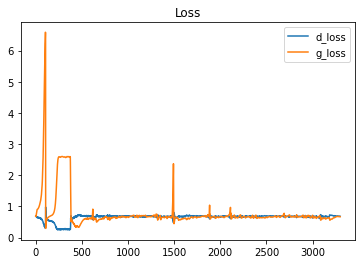

In [ ]:
plt.title('Loss')
plt.plot(hist.history['d_loss'],label= 'd_loss')
plt.plot(hist.history['g_loss'],label= 'g_loss')
plt.legend()
plt.show()

In [ ]:
!cd "images/"

In [ ]:

!zip images/results.zip images/*

  adding: images/download.png (deflated 3%)
  adding: images/generated_img_0_0.jpg (stored 0%)
  adding: images/generated_img_0_1.jpg (deflated 0%)
  adding: images/generated_img_0_2.jpg (deflated 0%)
  adding: images/generated_img_10_0.jpg (stored 0%)
  adding: images/generated_img_10_1.jpg (stored 0%)
  adding: images/generated_img_10_2.jpg (stored 0%)
  adding: images/generated_img_1_0.jpg (deflated 1%)
  adding: images/generated_img_11_0.jpg (stored 0%)
  adding: images/generated_img_11_1.jpg (stored 0%)
  adding: images/generated_img_11_2.jpg (stored 0%)
  adding: images/generated_img_1_1.jpg (deflated 1%)
  adding: images/generated_img_12_0.jpg (stored 0%)
  adding: images/generated_img_12_1.jpg (stored 0%)
  adding: images/generated_img_12_2.jpg (stored 0%)
  adding: images/generated_img_1_2.jpg (deflated 1%)
  adding: images/generated_img_13_0.jpg (stored 0%)
  adding: images/generated_img_13_1.jpg (stored 0%)
  adding: images/generated_img_13_2.jpg (stored 0%)
  adding: images

In [ ]:
fashgan.generator.save_weights('/content/gdrive/MyDrive/GAN/model_3300.h5')

In [ ]:
generator.load_weights(os.path.join('/content/gdrive/MyDrive/GAN','model_3300.h5'))

In [ ]:
images = generator.predict(tf.random.normal((16,128,1)))

1/1 [==============================] - 0s 172ms/step


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
images[5].shape

(28, 28, 1)

In [ ]:
fig,ax = plt.subplots(ncols=4,nrows=4,figsize=(20,20))
for r in range(4):
  for c in range (4):
    ax[r][c].imshow(np.squeeze(images[(r+1)*(c+1)-1]))